In [3]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
import random

img = Image.open('Lenna.png')
gray = img.convert("L")
gray = np.array(gray)
rgb = np.array(img)

In [176]:
class FCM(object):
    
    def __init__(self,C,iternum,m,gray):
        self.C = C
        self.m = m
        self.iternum = iternum
        self.data = gray
        self.img_x = self.data.shape[0]
        self.img_y = self.data.shape[1]        
        
        self.clusters = np.zeros([self.C],int)
        self.membership = np.zeros([self.img_x,self.img_y,self.C])
        self.J = 0
        
    def init_membership(self):
        for i in range(self.img_x):
            for j in range(self.img_y):
                for n in range(self.C):
                    self.membership[i,j,:] = np.random.dirichlet(np.ones(self.C),1)
    
    def cal_cluster(self):
        sumx = np.zeros([self.C])
        sumy = np.zeros([self.C])
        for n in range(self.C):
            sumx[n] = np.sum(self.data * self.membership[:,:,n] ** 2)
            sumy[n] = np.sum(self.membership[:,:,n] ** 2)
        self.clusters = sumx/sumy
    
    def cal_membership(self):
        num = 2/(self.m - 1)
        sumx = np.zeros([self.img_x,self.img_y,self.C])
        sumy = np.zeros([self.img_x,self.img_y])
        for n in range(self.C):
            sumx[:,:,n] = abs(self.data - self.clusters[n])
        for i in range(self.img_x):
            for j in range(self.img_y):
                sumy[i,j] = np.sum(sumx[i,j,:] ** num)
        sumx = sumx ** num
        for n in range(self.C):
            self.membership[:,:,n] = sumx[:,:,n] / sumy
    
    def cal_J(self):
        sumx = np.zeros([self.img_x,self.img_y,self.C])
        for n in range(self.C):
            sumx[:,:,n] = (self.clusters[n] ** self.m) * ((self.data - self.clusters[n]) ** 2)
        self.J = np.sum(sumx)

In [224]:
testclass = FCM(3,2,3,gray)

In [225]:
testclass.init_membership()
testclass.membership

array([[[0.40266356, 0.22530126, 0.37203519],
        [0.0710316 , 0.34505971, 0.58390868],
        [0.06566802, 0.65424691, 0.28008507],
        ...,
        [0.93232626, 0.00611992, 0.06155382],
        [0.13910379, 0.46063536, 0.40026086],
        [0.14246229, 0.46691466, 0.39062306]],

       [[0.52695589, 0.11579203, 0.35725208],
        [0.21586369, 0.38597327, 0.39816304],
        [0.3803928 , 0.28452426, 0.33508294],
        ...,
        [0.92225602, 0.06085347, 0.01689051],
        [0.08559273, 0.33072963, 0.58367764],
        [0.37432277, 0.40533445, 0.22034278]],

       [[0.24715249, 0.05614356, 0.69670395],
        [0.09211091, 0.81790313, 0.08998597],
        [0.01852898, 0.04604   , 0.93543102],
        ...,
        [0.47413422, 0.36659909, 0.15926669],
        [0.46041504, 0.51033567, 0.02924929],
        [0.27559711, 0.12388669, 0.6005162 ]],

       ...,

       [[0.51767078, 0.37831548, 0.10401374],
        [0.22938627, 0.29271859, 0.47789513],
        [0.21302195, 0

In [256]:
testclass.cal_cluster()
testclass.cal_J()
testclass.clusters,testclass.J

(array([ 95.59119249, 100.286655  , 150.86336025]), 4173253989926287.0)

In [255]:
testclass.cal_membership()
testclass.membership

array([[[0.13721345, 0.20487756, 0.65790899],
        [0.13721345, 0.20487756, 0.65790899],
        [0.13721345, 0.20487756, 0.65790899],
        ...,
        [0.17360374, 0.22871269, 0.59768358],
        [0.08838364, 0.17289471, 0.73872165],
        [0.29055223, 0.18459016, 0.52485761]],

       [[0.13721345, 0.20487756, 0.65790899],
        [0.13721345, 0.20487756, 0.65790899],
        [0.13721345, 0.20487756, 0.65790899],
        ...,
        [0.17360374, 0.22871269, 0.59768358],
        [0.08838364, 0.17289471, 0.73872165],
        [0.29055223, 0.18459016, 0.52485761]],

       [[0.13721345, 0.20487756, 0.65790899],
        [0.13721345, 0.20487756, 0.65790899],
        [0.13721345, 0.20487756, 0.65790899],
        ...,
        [0.17360374, 0.22871269, 0.59768358],
        [0.08838364, 0.17289471, 0.73872165],
        [0.29055223, 0.18459016, 0.52485761]],

       ...,

       [[0.4154301 , 0.38710556, 0.19746434],
        [0.4154301 , 0.38710556, 0.19746434],
        [0.42290458, 0

In [185]:
x = np.zeros([testclass.img_x,testclass.img_y])
for i in range(testclass.img_x):
    for j in range(testclass.img_y):
        x[i,j] = np.sum(testclass.membership[i,j])

In [170]:
x

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [47]:
np.sum(testclass.data * testclass.membership[:,:,1])/np.sum(testclass.membership[:,:,1])

124.03115541532469

In [73]:
testclass.membership

array([[2.98473967, 2.98473967, 2.98473967, ..., 2.98738655, 2.98130745,
        2.85897051],
       [2.98473967, 2.98473967, 2.98473967, ..., 2.98738655, 2.98130745,
        2.85897051],
       [2.98473967, 2.98473967, 2.98473967, ..., 2.98738655, 2.98130745,
        2.85897051],
       ...,
       [3.00719323, 3.00719323, 3.0078748 , ..., 3.02926745, 3.02436464,
        3.0224816 ],
       [3.00728329, 3.00728329, 3.00844646, ..., 3.02926745, 3.03081778,
        3.0366404 ],
       [3.00728329, 3.00728329, 3.00844646, ..., 3.02926745, 3.03081778,
        3.0366404 ]])

In [40]:
testclass.membership

array([[[2.27860124e-01, 5.87445829e-01, 1.84694047e-01],
        [2.25047120e-01, 2.94673451e-01, 4.80279429e-01],
        [3.82343909e-02, 6.09666124e-01, 3.52099485e-01],
        ...,
        [5.15558603e-01, 4.43264473e-01, 4.11769240e-02],
        [2.68834719e-01, 2.89642427e-01, 4.41522854e-01],
        [8.99854522e-01, 3.18860129e-03, 9.69568771e-02]],

       [[3.87670185e-01, 4.69642250e-01, 1.42687565e-01],
        [2.99692497e-01, 2.59716744e-01, 4.40590759e-01],
        [7.94248638e-01, 1.94421580e-01, 1.13297816e-02],
        ...,
        [5.59881660e-01, 1.59549352e-01, 2.80568988e-01],
        [2.51832065e-01, 1.48485200e-01, 5.99682736e-01],
        [9.74517651e-02, 2.02420806e-01, 7.00127428e-01]],

       [[3.82879541e-01, 4.71507408e-01, 1.45613051e-01],
        [3.54857738e-01, 1.17887250e-01, 5.27255012e-01],
        [1.40200288e-01, 8.22916173e-01, 3.68835395e-02],
        ...,
        [5.41488104e-02, 4.39577737e-01, 5.06273452e-01],
        [5.29081847e-01, 3.75

In [49]:
testclass.membership[:,:,1]**2

array([[2.23106087e-02, 3.41996980e-01, 2.87402918e-01, ...,
        2.32287187e-01, 1.24390163e-01, 6.17218302e-01],
       [5.50252842e-04, 4.97904460e-02, 1.64437512e-02, ...,
        2.23334223e-01, 1.32540004e-02, 2.11377300e-01],
       [1.09675476e-01, 1.14428703e-01, 7.35762740e-03, ...,
        4.18937182e-01, 6.35032102e-02, 1.59845128e-02],
       ...,
       [8.11467157e-03, 4.37021085e-02, 6.91142377e-02, ...,
        2.86276671e-03, 1.62363240e-01, 6.55671091e-01],
       [1.31426852e-01, 1.99852965e-01, 5.45743215e-01, ...,
        1.16085102e-01, 2.72396646e-01, 5.05666715e-03],
       [1.50507689e-02, 2.38251497e-01, 5.94897859e-01, ...,
        1.61834291e-01, 6.75958990e-02, 1.70279295e-01]])

In [58]:
testclass.data - testclass.clusters[0]

array([[ 37.98737291,  37.98737291,  37.98737291, ...,  45.98737291,
         30.98737291,   3.98737291],
       [ 37.98737291,  37.98737291,  37.98737291, ...,  45.98737291,
         30.98737291,   3.98737291],
       [ 37.98737291,  37.98737291,  37.98737291, ...,  45.98737291,
         30.98737291,   3.98737291],
       ...,
       [-81.01262709, -81.01262709, -74.01262709, ..., -20.01262709,
        -24.01262709, -26.01262709],
       [-80.01262709, -80.01262709, -69.01262709, ..., -20.01262709,
        -19.01262709, -16.01262709],
       [-80.01262709, -80.01262709, -69.01262709, ..., -20.01262709,
        -19.01262709, -16.01262709]])

In [62]:
sumx = np.zeros([testclass.img_x,testclass.img_y,testclass.C])
for i in range(3):
    sumx[:,:,i] = abs(testclass.data - testclass.clusters[i])

In [63]:
sumx

array([[[37.98737291, 37.87345255, 37.98360865],
        [37.98737291, 37.87345255, 37.98360865],
        [37.98737291, 37.87345255, 37.98360865],
        ...,
        [45.98737291, 45.87345255, 45.98360865],
        [30.98737291, 30.87345255, 30.98360865],
        [ 3.98737291,  3.87345255,  3.98360865]],

       [[37.98737291, 37.87345255, 37.98360865],
        [37.98737291, 37.87345255, 37.98360865],
        [37.98737291, 37.87345255, 37.98360865],
        ...,
        [45.98737291, 45.87345255, 45.98360865],
        [30.98737291, 30.87345255, 30.98360865],
        [ 3.98737291,  3.87345255,  3.98360865]],

       [[37.98737291, 37.87345255, 37.98360865],
        [37.98737291, 37.87345255, 37.98360865],
        [37.98737291, 37.87345255, 37.98360865],
        ...,
        [45.98737291, 45.87345255, 45.98360865],
        [30.98737291, 30.87345255, 30.98360865],
        [ 3.98737291,  3.87345255,  3.98360865]],

       ...,

       [[81.01262709, 81.12654745, 81.01639135],
        [81

In [27]:
class FCM(object):
    
    def __init__(self,C,iternum,m,gray):
        self.C = C
        self.m = m
        self.iternum = iternum
        self.data = gray
        self.img_x = self.data.shape[0]
        self.img_y = self.data.shape[1]
        self.size = self.img_x * self.img_y
        self.data = gray.reshape(self.size)
        
        self.clusters = np.zeros([self.C],int)
        self.membership = np.random.random((self.size,self.C))
        self.membership = self.membership / np.tile(self.membership.sum(axis=1)[np.newaxis].T,self.C)
        self.J = 0
    
    def cal_cluster(self):
        self.clusters = testclass.data.T @ testclass.membership ** self.m / np.sum(testclass.membership ** self.m, axis=0)
    
    def cal_membership(self):
        parax = np.zeros([self.size,self.C])
        paray = np.zeros([self.size,self.C,self.C])
        num = 2/(self.m - 1)
        for n in range(self.C):
            parax[:,n] = abs(self.data - self.clusters[n])
        for i in range(self.C):
            for j in range(self.C):
                paray[:,i,j] = parax[:,i] / parax[:,j]
        for i in range(self.C):
            self.membership[:,i] = 1/np.sum(paray[:,i,:] ** num,axis=1)
        
    def outputimg(self):
        maxindex = np.argmax(testclass.membership,axis=1)
        grayo = np.zeros([self.size],int)
        graygrade = np.uint8(self.clusters)
        for i in range(self.size):
            grayo[i] = graygrade[maxindex[i]]
        return grayo.reshape(self.img_x,self.img_y)
    
    def cal_J(self):
        

In [132]:
testclass = FCM(3,2,3,gray)
testclass.membership

array([[0.50120143, 0.30003892, 0.19875965],
       [0.58003723, 0.14402809, 0.27593468],
       [0.10838839, 0.76398887, 0.12762274],
       ...,
       [0.29410654, 0.57788536, 0.12800809],
       [0.36730861, 0.19898338, 0.43370801],
       [0.47777381, 0.25994115, 0.26228504]])

In [168]:
testclass.cal_cluster()
testclass.clusters

array([ 68.69419847, 132.39918424, 168.33204195])

In [169]:
testclass.cal_membership()
testclass.membership

array([[0.05294469, 0.16688887, 0.78016644],
       [0.05294469, 0.16688887, 0.78016644],
       [0.05294469, 0.16688887, 0.78016644],
       ...,
       [0.35816573, 0.44527082, 0.19656345],
       [0.34502629, 0.45718353, 0.19779018],
       [0.30651917, 0.49378625, 0.19969458]])

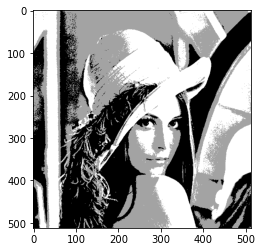

In [170]:
plt.imshow(testclass.outputimg(),'gray')

In [164]:
testclass.outputimg()

array([[159, 159, 159, ..., 159, 159, 136],
       [159, 159, 159, ..., 159, 159, 136],
       [159, 159, 159, ..., 159, 159, 136],
       ...,
       [ 80,  80,  80, ...,  80,  80,  80],
       [ 80,  80,  80, ...,  80,  80,  80],
       [ 80,  80,  80, ...,  80,  80,  80]])

In [104]:
testclass.membership[:,0]

array([0.49900427, 0.49900427, 0.49900427, ..., 0.50188506, 0.50198402,
       0.50235493])

In [105]:
parax = np.zeros([testclass.size,3])
paray = np.zeros([testclass.size,3,3])
for n in range(3):
    parax[:,n] = abs(testclass.data - testclass.clusters[n])
for i in range(3):
    for j in range(3):
        paray[:,i,j] = parax[:,i] / parax[:,j]

IndexError: index 2 is out of bounds for axis 0 with size 2

In [350]:
1/np.sum(paray[:,1,:],axis=1)

array([0.33409684, 0.33409684, 0.33409684, ..., 0.33188628, 0.33181026,
       0.33152526])

In [345]:
paray[:,:,1]

array([[1.00356583, 1.        , 1.00331368],
       [1.00356583, 1.        , 1.00331368],
       [1.00356583, 1.        , 1.00331368],
       ...,
       [0.99326428, 1.        , 0.9937406 ],
       [0.99291119, 1.        , 0.99341248],
       [0.99158836, 1.        , 0.99218319]])

In [334]:
parax[:,1] / parax[:,0]

array([0.99644684, 0.99644684, 0.99644684, ..., 1.00678139, 1.00713942,
       1.008483  ])

In [73]:
testclass.membership[1,:]

array([0.10612732, 0.56385348, 0.3300192 ])

In [75]:
indexnp.max(testclass.membership[1,:])

0.5638534761977526

In [77]:
np.argmax(testclass.membership[1,:])

1

In [82]:
test = np.argmax(testclass.membership,axis=1)

In [93]:
grayo = np.zeros([test.shape[0]],int)
for i in range(test.shape[0]):
    grayo[i] = graygrade[test[i]]

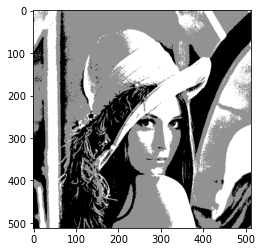

In [95]:
plt.imshow(grayo.reshape(512,512),'gray')

In [86]:
graygrade = np.uint8(testclass.clusters)

In [87]:
graygrade

array([ 57, 181, 128], dtype=uint8)